Author: BAHNI ROY  
Data Science and Buisiness Analytics Intern

# Task 1 : Prediction Using Supervised ML

In [17]:
## Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Reading the data from remote link

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data Imported Successfully")

print ("Data shape :", data.shape)
data.head()

Data Imported Successfully
Data shape : (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**So there are 2 columns (Hours,Scores) and 25 rows in our dataset.**

Text(0, 0.5, 'Score')

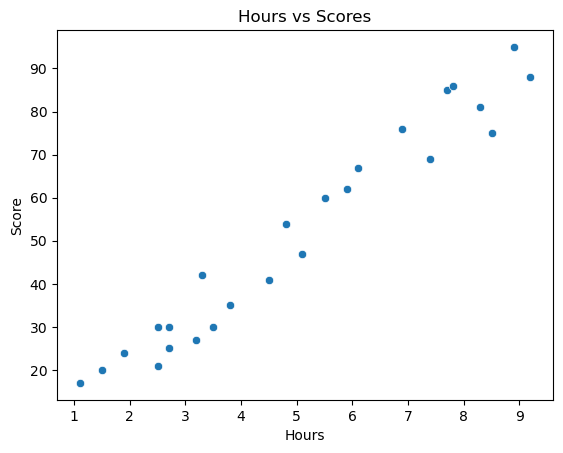

In [22]:
# Plotting the Hours vs. Scores

sns.scatterplot(x='Hours', y='Scores', data = data)  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Score')  

In [23]:
data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [24]:
data.corr(method = 'spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


**Based on the graph and the calculated correlation coefficients, we can infer a positive linear relationship between the number of hours studied and the percentage of scores achieved.**

**Preparing the data**

In [27]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

In [29]:
from sklearn.model_selection import train_test_split  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [30]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training Complete.")

Training Complete.


Text(0, 0.5, 'Predicted Value')

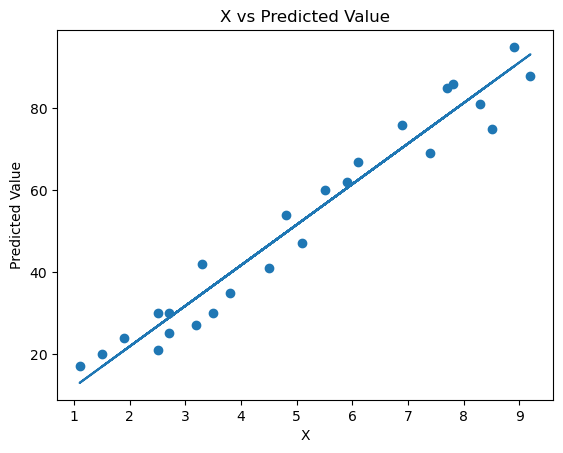

In [38]:
# Plotting

m = regressor.coef_
c = regressor.intercept_

Z = m*X + c  # predicted value of Y based on the linear relationship with X

plt.scatter(X, y)
plt.plot(X, Z)
plt.title('X vs Predicted Value')  
plt.xlabel('X')  
plt.ylabel('Predicted Value') 

**Making Predictions**

In [39]:
print(X_test) # Testing data (Hours)
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [40]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<Axes: >

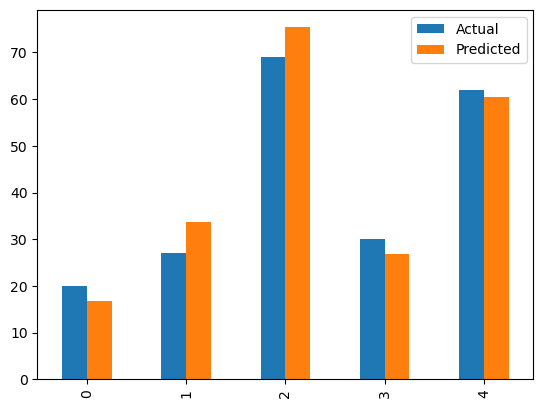

In [42]:
# Comparing Actual vs Predicted Visually

df.plot(kind='bar')

In [53]:
# Predicting the score if a student studies 9.25 hours/day : 

h = 9.25
pred = regressor.predict(np.array(h).reshape(1,-1))

print("No. of Hours = {}".format(h))
print("Predicted Score = {}".format(pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737538


**Evaluating the model**

In [61]:
from sklearn import metrics  
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Absolute Error :', metrics.mean_absolute_error(Y_test, Y_pred))
print('R2 Score :', r2_score(Y_test, Y_pred) )


Mean Absolute Error : 4.183859899002975
R2 Score : 0.9454906892105356
